The following code ask an user to select the process where Heat Addition Occurs and decides whether to draw a Carnot Cycle, Otto Cycle or Diesel Cycle based on user-defined inputs. 

Where does heat addition occur?
1. Isothermal (at constant temperature)
2. Constant Volume
3. Constant Pressure


Enter 1 / 2 / 3:  3


Diesel Cycle selected.
Diesel Cycle Parameters


Enter minimum pressure:  1e5
Enter maximum volume:  0.5
Enter Compression Ratio: 4
Enter Cutoff Ratio 1.5
Enter adaibatic index:  1.4


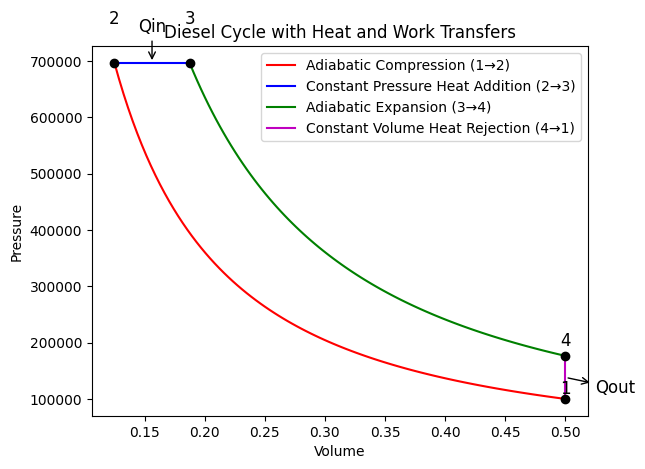

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def carnot_cycle():
    print("Carnot Cycle Parameters")
    p_min = float(input("Enter minimum pressure: "))
    p_max = float(input("Enter maximum pressure: "))
    v_max = float(input("Enter maximum volume: "))
    r = float(input("Enter Compression Ratio:"))
    gamma = float(input("Enter adaibatic index: "))

    # Process 1-2
    p1=p_min
    v1=v_max
    v2=v1/r
    c1=p1*v1

    # Process 2-3
    c2=c1*v2**(gamma-1)
    p3=p_max
    v3=(c2/p3)**(1/gamma)

    # Process 3-4
    c3=p3*v3

    # Process 4-1
    c4=p1*v1**gamma
    v4= (c4/c3)**(1/(gamma-1))

    # Plotting the Carnot cycle

    #Plot Process 1-2
    v = np.linspace(v2, v1, 100)
    p = c1 / v
    plt.plot(v, p, 'r', label='Isothermal Compression (1→2)')

    #Plot Process 2-3
    v = np.linspace(v3, v2, 100)
    p = c2 / v**gamma
    plt.plot(v, p, 'b', label='Adiabatic Compression (2→3)')

    #Plot Process 3-4
    v = np.linspace(v3, v4, 100)
    p = c3 / v
    plt.plot(v, p, 'g', label='Isothermal Expansion (3→4)')

    #Plot Process 4-1
    v = np.linspace(v4, v1, 100)
    p = c4 / v**gamma
    plt.plot(v, p, 'm', label='Adiabatic Expansion (4→1)')


    #Show state points
    states = {'1': (v1, p1), '2': (v2, c1 / v2), '3': (v3, p3), '4': (v4, c3 / v4)}

    for label, (vx, px) in states.items():
        plt.plot(vx, px, 'ko')  # black dot
        plt.text(vx, px * 1.1, label, fontsize=12, ha='center')

    #Show arrows for Heat and Work Teanfers

    # Qin (3–4): Isothermal Expansion
    v_qin = (v3 + v4) / 2
    p_qin = c3 / v_qin
    plt.annotate('Qin', xy=(v_qin, p_qin), xytext=(v_qin, p_qin * 1.4),arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, ha='center')

    # Qout (1–2): Isothermal Compression
    v_qout = (v1 + v2) / 2
    p_qout = c1 / v_qout
    plt.annotate('Qout', xy=(v_qout, p_qout), xytext=(v_qout, p_qout * 0.6), arrowprops=dict(facecolor='red', arrowstyle='<-'), fontsize=12, ha='center')


    plt.title('Carnot Cycle with Heat and Work Transfers')
    plt.xlabel('Volume')
    plt.ylabel('Pressure')
    plt.legend()
    plt.show()


def otto_cycle():
    print("Otto Cycle Parameters")
    p_min = float(input("Enter minimum pressure: "))
    p_max = float(input("Enter maximum pressure: "))
    v_max = float(input("Enter maximum volume: "))
    r = float(input("Enter Compression Ratio:"))
    gamma = float(input("Enter adaibatic index: "))

    # Process 1-2
    p1=p_min
    v1=v_max
    c1=p1*v1**gamma 
    v2=v1/r
    p2=c1/v2**gamma

    # Process 2-3
    p3=p_max
    v3=v2

    # Process 3-4
    c2=p3*v3**gamma
    v4=v1
    p4=c2/v4**gamma

    # Plotting the Otto Cycle

    #Plot Process 1–2
    v = np.linspace(v1, v2, 100)
    p = c1 / v**gamma
    plt.plot(v, p, 'r', label='Adiabatic Compression')

    #Plot Process 2–3
    v = np.full(100, v2)
    p = np.linspace(p2, p3, 100)
    plt.plot(v, p, 'b', label='Isochoric Heat Addition')

    #Plot Process 3–4
    v = np.linspace(v3, v4, 100)
    p = c2 / v**gamma
    plt.plot(v, p, 'g', label='Adiabatic Expansion')

    #Plot Process 4–1
    v = np.full(100, v1)
    p = np.linspace(p4, p1, 100)
    plt.plot(v, p, 'm', label='Isochoric Heat Rejection')

    #Show State Points
    states = {'1': (v1, p1),'2': (v2, p2),'3': (v3, p3),'4': (v4, p4)}

    for label, (vx, px) in states.items():
        plt.plot(vx, px, 'ko')  # black dot
        plt.text(vx, px * 1.1, label, fontsize=12, ha='center')

    #Show arrows for Heat and Work Teanfers

    # Qin (2–3): Isochoric heat addition
    plt.annotate('Qin', xy=(v2, (p2 + p3)/2), xytext=(v2 * 0.95, (p2 + p3)/2 * 1.2),arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12)

    # Qout (4–1): Isochoric heat rejection
    plt.annotate('Qout', xy=(v1, (p1 + p4)/2), xytext=(v1 * 1.05, (p1 + p4)/2 * 0.8), arrowprops=dict(facecolor='red', arrowstyle='<-'), fontsize=12)

    plt.title('Otto Cycle with Heat and Work Transfers')
    plt.xlabel('Volume')
    plt.ylabel('Pressure')
    plt.legend()
    plt.show()


def diesel_cycle():
    print("Diesel Cycle Parameters")

    p_min = float(input("Enter minimum pressure: "))
    v_max = float(input("Enter maximum volume: "))
    r = float(input("Enter Compression Ratio:"))
    rc = float(input("Enter Cutoff Ratio"))
    gamma = float(input("Enter adaibatic index: "))

    # Process 1-2
    p1=p_min
    v1=v_max
    c1=p1*v1**gamma
    v2=v1/r
    p2=c1/v2**gamma

    # Process 2-3
    p3=p2
    v3=rc*v2

    # Process 3-4
    c2=p3*v3**gamma
    v4=v1
    p4=c2/v4**gamma

    # Plotting the Diesel Cycle

    # Process 1–2: Adiabatic Compression
    v = np.linspace(v1, v2, 100)
    p = c1 / v**gamma
    plt.plot(v, p, 'r', label='Adiabatic Compression (1→2)')

    # Process 2–3: Constant Pressure Heat Addition
    v = np.linspace(v2, v3, 100)
    p = np.full_like(v, p2)
    plt.plot(v, p, 'b', label='Constant Pressure Heat Addition (2→3)')

    # Process 3–4: Adiabatic Expansion
    v = np.linspace(v3, v4, 100)
    p = c2 / v**gamma
    plt.plot(v, p, 'g', label='Adiabatic Expansion (3→4)')

    # Process 4–1: Constant Volume Heat Rejection
    v = np.full(100, v1)
    p = np.linspace(p4, p1, 100)
    plt.plot(v, p, 'm', label='Constant Volume Heat Rejection (4→1)')

    # Annotating State Points
    states = {'1': (v1, p1), '2': (v2, p2), '3': (v3, p3),'4': (v4, p4)}

    for label, (vx, px) in states.items():
        plt.plot(vx, px, 'ko')  # black dot
        plt.text(vx, px * 1.1, label, fontsize=12, ha='center')

    #Show Arrows for heat and work

    # Qin (2–3): Constant-pressure heat addition
    v_qin = (v2 + v3) / 2
    p_qin = p2
    plt.annotate('Qin', xy=(v_qin, p_qin), xytext=(v_qin, p_qin * 1.08), arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, ha='center')

    # Qout (4–1): Constant-volume heat rejection
    v_qout = v1
    p_qout = (p4 + p1) / 2
    plt.annotate('Qout', xy=(v_qout, p_qout), xytext=(v_qout * 1.05, p_qout * 0.8), arrowprops=dict(facecolor='red', arrowstyle='<-'), fontsize=12)

    plt.title('Diesel Cycle with Heat and Work Transfers')
    plt.xlabel('Volume')
    plt.ylabel('Pressure')
    plt.legend()
    plt.show()


# --- Main Program ---

print("Where does heat addition occur?")
print("1. Isothermal (at constant temperature)")
print("2. Constant Volume")
print("3. Constant Pressure")
choice = input("Enter 1 / 2 / 3: ")

if choice == '1':
    print("Carnot Cycle selected.")
    carnot_cycle()
elif choice == '2':
    print("Otto Cycle selected.")
    otto_cycle()
elif choice == '3':
    print("Diesel Cycle selected.")
    diesel_cycle()
else:
    print("Invalid input. Please enter 1, 2, or 3.")